# Week 5 - Deep Learning

In last week's lecture you have learned about the concepts that make Deep Learing work. You may have not realized it, but the Keras library captures the "modularity" concept discussed in the lecture. It automatically calculates the derivates from layer to layer so that you can combine different modules to make your own neural network.

Today you will learn to apply the following concepts:

* Convolutional Neural Network
* Transfer Learning

In [0]:
import tensorflow
import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt




# function to reset random seed for reproducibility
def reset_seed():
  np.random.seed(1)
  tensorflow.set_random_seed(1)


## Recap

Last week you learned about to create a dense neural network for handwritten image classification. Today we will use a different dataset: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) (click to read more).

In short: the dataset contains greyscale images of 10 categories of clothing.

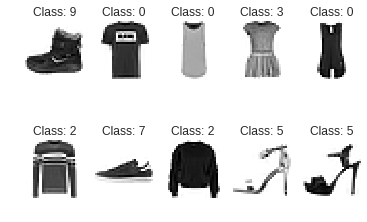

In [0]:
from keras.datasets import fashion_mnist

# load the data, split between train and test sets
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# hyper parameters
K = 10
N_train, img_rows, img_cols = x_train.shape
N_test, *_ = x_test.shape

# print examples
images_and_labels = list(zip(x_train, t_train))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Class: %i' % label)

In [0]:
# Exercise: Prepare your inputs:

### START YOUR CODE HERE ###
# normalize (between zero and one, 
# divide by maximum value in training set is fine, because we work with greyscale values
x_train /= 255
x_test /= 255

# Turn input into a matrix (N, img_rows*img_cols): X_train, X_test (capital X denotes matrix of the tensor x)
X_train = x_train.reshape(N_train,-1)
X_test = x_test.reshape(N_test,-1)

# Turn target into a matrix (N, K): T_train, T_test (capital T denotes matrix of the vector t)
T_train = np.zeros((N_train,K))
T_test = np.zeros((N_test,K))
for c in range(K):
    T_train[t_train==c,c] = 1
    T_test[t_test==c,c] = 1
### END YOUR CODE HERE ###

print('x_train shape:', x_train.shape)
print('X_train shape:', X_train.shape)
print('x_test shape:', x_test.shape)
print('X_test shape:', X_test.shape)

print('t_train shape:', t_train.shape)
print('T_train shape:', T_train.shape)
print('t_test shape:', t_test.shape)
print('T_test shape:', T_test.shape)

x_train shape: (60000, 28, 28)
X_train shape: (60000, 784)
x_test shape: (10000, 28, 28)
X_test shape: (10000, 784)
t_train shape: (60000,)
T_train shape: (60000, 10)
t_test shape: (10000,)
T_test shape: (10000, 10)


In [0]:
# Exercise: create a feed forward neural network on
# Properties:
# - 2 hidden layers of 50 and 25 units respectively
# - ReLU Activation functions
# - Adam optimizer
# - 20 epochs (start with less to check if code runs correctly)
# - 128 batch size
# - train on X_train, and T_train
# - validation set of X_test, Test
# - Calculate accuracy during training
reset_seed()

# import these submodules directly for readability
# do this for often used submodules
from keras.models import Sequential
from keras.layers import Dense

### START YOUR CODE HERE ###
# indicate we want to use a sequential neural network
model = Sequential()

# add hidden layer(s)
model.add(Dense(units=50,
                  activation='relu',
                  ))             

model.add(Dense(units=25,
                  activation='relu',
                  ))             

# add output layer
model.add(Dense(units=K, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', # choose loss function to optimize
              optimizer='adam',        # choose optimizer to do the above
              metrics=['accuracy'])       # choose metrics to print

# fit
history = model.fit(X_train,T_train,
                    epochs=20,      
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_test,T_test),
                   )

### END YOUR CODE HERE ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.6819 - acc: 0.7680 - val_loss: 0.4771 - val_acc: 0.8335
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.4347 - acc: 0.8481 - val_loss: 0.4361 - val_acc: 0.8486
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3940 - acc: 0.8622 - val_loss: 0.4082 - val_acc: 0.8590
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3665 - acc: 0.8703 - val_loss: 0.3932 - val_acc: 0.8646
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3481 - acc: 0.8761 - val_loss: 0.4063 - val_acc: 0.8584
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3335 - acc: 0.8805 - val_loss: 0.3895 - val_acc: 0.8619
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3229 - acc: 0.8828 - val_loss: 0.3720 - val_acc

10000/10000 [==============================] - 1s 68us/step
Validation Accuracy: 0.8824


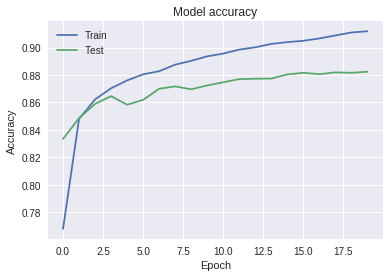

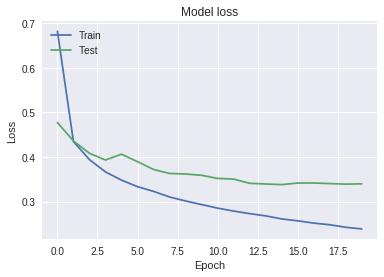

In [0]:
# Visualize training history

# get loss and accuracy
loss, acc = model.evaluate(X_test,T_test)

print(f'Validation Accuracy: {acc}')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**@Exercise:**

**Describe the relationship between train / test loss and epochs.**

As the number of epochs increases the model will fit the training set better. Hence after a while it can potentially start to overfit.

**Describe how "early stopping" is a form of regularization**

In line with the answer above, early stopping is a form of regularization because it can prevent this overfiting on the training set.

**How many parameters does this model have?**

run model.summary() and check last line, alternatively inspect all parameters with model.get_weights()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_30 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                260       
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________


# Convolutional Neural Networks

Now we will train the same dataset on a Convolutional Neural Network.

We need to do one preprocessing step to adjust our image data.
Remember that x_train (lower case)
 has the shape N_train, img_rows, img_cols. However, Keras expects a fourth dimension: 'channel'. This dimension has a length of 3 in the case of color images. For our black and white digits we simply need to add a dimension of length 1

In [0]:
# reshape image matrices to tensors (add a final dimension for layers)
x_train = x_train.reshape(N_train, img_rows, img_cols, 1)
x_test = x_test.reshape(N_test, img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
# Exercise: create a feed forward neural network
# Architecture:
# - 2D Convolutional Layer of 32 filters, a (3,3) kernel, and relu activation
# - 2D Convolutional Layer of 64 filters, a (3,3) kernel, and relu activation
# - 2D Max Pooling Layer with a (2,2) pool size
# - Dropout of 25%
# - Flatten the results to an array
# - Dense layer with 128 nodes and relu activation
# - Dropout of 50%
# - An output layer
# Optimizer & Fit:
# - Adam optimizer
# - 12 epochs (start with less to check if code is correctly)
# - 128 batch size
reset_seed()

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# CNN

### START YOUR CODE HERE ###
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(K, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, T_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, T_test))

### END YOUR CODE HERE ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.5264 - acc: 0.8170 - val_loss: 0.3343 - val_acc: 0.8796
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.3344 - acc: 0.8815 - val_loss: 0.2866 - val_acc: 0.8977
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2866 - acc: 0.8970 - val_loss: 0.2669 - val_acc: 0.9022
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2565 - acc: 0.9079 - val_loss: 0.2412 - val_acc: 0.9094
Epoch 5/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2320 - acc: 0.9165 - val_loss: 0.2306 - val_acc: 0.9154
Epoch 6/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2129 - acc: 0.9221 - val_loss: 0.2254 - val_acc: 0.9178
Epoch 7/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1996 - acc: 0.9272 - val_loss: 0.

10000/10000 [==============================] - 1s 106us/step
Validation Accuracy: 0.9278


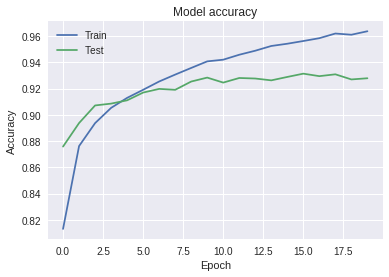

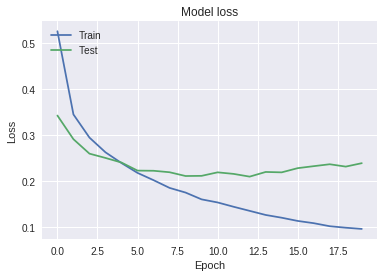

In [0]:
# Visualize training history

# get loss and accuracy
loss, acc = model.evaluate(x_test,T_test)

print(f'Validation Accuracy: {acc}')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**@Exercise: Compare the feedforward with the Convolutional Neural Network**

**Compare the training/testing accuracy. What do you find?  Did you expect these results?**

**How many parameters does the first convolutional layer have? How many does the second convolutional layer have?**

**Describe in your own words what Dropout does and how it can help improve model performance.**

**Test if Dropout is helping in the above model (remove/comment the dropout layers)**

# Transfer Learning

As discussed during the lecture. In most real world scenarios you don't want to make up your own architecture. Nor do you want to train the model weights from scratch. Instead, you want to stand on the shoulders of giants, and use their tuned architectures and weights as a starting point. This is called transfer learning. The big benefit of transfer learning is that we can train a classifier on relatively small datasets. 

In today's class we will preload the MobileNet architecture from Keras and use it to train a model which can distinguish between cats, dogs, and horses. We do this with a dataset of less than 200 images.

Datatset source: https://github.com/aditya9898/transfer-learning

Note: we use mobilenet simply because it is small and will train relatively quickly.

Notice that while we have fewer observations (N), these images are quite a bit larger. Hence it is inefficient to load all pictures in the working memory at the same time. You will learn how to create a generator that loads the images batch by batch. This trick is important when you work with larger datasets.

In [0]:
# download this git to your server
!git clone https://github.com/aditya9898/transfer-learning.git

In [0]:
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [0]:
# Create Data Generators
# This code loads images in your working memory on the fly and transforms them as well

datagen=ImageDataGenerator(preprocessing_function=preprocess_input, # mobilenet preprocessing
                                 validation_split=0.2) #included in our dependencies

train_generator=datagen.flow_from_directory('transfer-learning/train/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')

test_generator=datagen.flow_from_directory('transfer-learning/train/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=39,
                                                 class_mode='categorical',
                                                 subset='validation')


Found 158 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [0]:
# Create a model

# load a base model
base_model=MobileNet(                    # load the mobilenet architecture
                     weights='imagenet',       # option to load the pretained imagenet weights
                     include_top=False)  # discard the last classification layer for imagenet classes

# adjust the model using keras functional api
# documentation: https://keras.io/getting-started/functional-api-guide/
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)

# print model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [0]:
reset_seed()

# Decide which layers of the model to train
# Below we created a for loop over the base_model so you can specify if you want to update the initial weights
for layer in base_model.layers:
  layer.trainable=True
  
# compile the model as before
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

# With a generator function the fit process is slightly different:


## calculate step size (number of steps per epoch)
step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size

## fit for a number of epochs
model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    validation_steps=step_size_test,
                    steps_per_epoch=step_size_train,
                    epochs=12)

Epoch 1/12
4/4 [==============================] - 25s 6s/step - loss: 2.0872 - acc: 0.5070 - val_loss: 0.4417 - val_acc: 0.8205
Epoch 2/12
4/4 [==============================] - 2s 377ms/step - loss: 0.4307 - acc: 0.7776 - val_loss: 0.3166 - val_acc: 0.8462
Epoch 3/12
4/4 [==============================] - 1s 375ms/step - loss: 0.0510 - acc: 0.9922 - val_loss: 0.0891 - val_acc: 0.9487
Epoch 4/12
4/4 [==============================] - 2s 379ms/step - loss: 0.0446 - acc: 0.9766 - val_loss: 0.1410 - val_acc: 0.9744
Epoch 5/12
4/4 [==============================] - 2s 378ms/step - loss: 0.0414 - acc: 0.9839 - val_loss: 1.4240 - val_acc: 0.8462
Epoch 6/12
4/4 [==============================] - 2s 379ms/step - loss: 0.0586 - acc: 0.9765 - val_loss: 0.9836 - val_acc: 0.8974
Epoch 7/12
4/4 [==============================] - 2s 379ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.9683 - val_acc: 0.8974
Epoch 8/12
4/4 [==============================] - 1s 375ms/step - loss: 0.0902 - acc: 0.9608

**@Exercise:**

**A) Make sure you know what each line of code does. Check the documentation or ask if anything is unclear.**

**B) Why do we need to use a special MobileNet preprocessing function? Why don't we normalize the inputs based on our new dataset?**

We do this because the pre-trained weights only make sense for the Mobile Net Imagenet initialization. 
For example: imagine our new dataset (of ~200 images) consisted only of different types of tree leaves. If we were to normalize on our own data, then we could potentially lose all 'green' values because almost all leaves are green. Now the mobilenet model weights for green are useless!

**C) Compare the train/test performance for the following three scenarios. Explain the differences**

* No pre-trained weights, update all layers
* Imagenet pre-trained weights, update all layers
* Imagenet pre-trained weights, only update the new layers

Without pretrained weights you must update all layers otherwise they just keep projecting noise.
With pre-trained weights you don't want to override them immideately because that throws away valuable information. You do that by freezing the early layers or by setting very small learning rates for those layers.

Also training is much quicker if we only update the last layers

**D) Suppose we had a dataset with images very different from imagenet (e.g. satellite image data) how would the previous results change**

The difference between pre-trained and non-pretrained would decrease because the pre-trained weights are less useful in that case. In particular we would want to update more layers of the model. We would still want to freeze / have a lower learning rate for the earlier layers because the patterns learned at that level are probably still useful.